Import Libraries

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
   
import warnings
warnings.filterwarnings('ignore')
   
from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory

import os
import matplotlib.image as mpimg

 Load and Preprocess Data

In [6]:
train_dir = r'C:\Users\abdul\Downloads\project\chest_xray\train'
test_dir = r'C:\Users\abdul\Downloads\project\chest_xray\test'

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary'
)


Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


Model Architecture

In [7]:
model = tf.keras.models.Sequential([
	layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
	layers.MaxPooling2D(2, 2),
	layers.Conv2D(64, (3, 3), activation='relu'),
	layers.MaxPooling2D(2, 2),
	layers.Conv2D(64, (3, 3), activation='relu'),
	layers.MaxPooling2D(2, 2),
	layers.Conv2D(64, (3, 3), activation='relu'),
	layers.MaxPooling2D(2, 2),

	layers.Flatten(),
	layers.Dense(512, activation='relu'),
	layers.BatchNormalization(),
	layers.Dense(512, activation='relu'),
	layers.Dropout(0.1),
	layers.BatchNormalization(),
	layers.Dense(512, activation='relu'),
	layers.Dropout(0.2),
	layers.BatchNormalization(),
	layers.Dense(512, activation='relu'),
	layers.Dropout(0.2),
	layers.BatchNormalization(),
	layers.Dense(2, activation='sigmoid')
])


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     6,423,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,313,474 (27.90 MB)

 Trainable params: 7,309,378 (27.88 MB)

 Non-trainable params: 4,096 (16.00 KB)

 Build the CNN Model

In [7]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


Compile the Model

In [8]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


Train the Model

In [9]:
history = model.fit(train_generator, epochs=10, validation_data=test_generator)


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 303s 2s/step - accuracy: 0.7975 - loss: 0.8881 - val_accuracy: 0.7244 - val_loss: 0.9025
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 264s 2s/step - accuracy: 0.9590 - loss: 0.1073 - val_accuracy: 0.7244 - val_loss: 1.0753
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 238s 1s/step - accuracy: 0.9705 - loss: 0.0815 - val_accuracy: 0.7548 - val_loss: 0.7989
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 209s 1s/step - accuracy: 0.9723 - loss: 0.0806 - val_accuracy: 0.6907 - val_loss: 1.9005
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 202s 1s/step - accuracy: 0.9766 - loss: 0.0586 - val_accuracy: 0.7276 - val_loss: 1.4071
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 202s 1s/step - accuracy: 0.9871 - loss: 0.0359 - val_accuracy: 0.7420 - val_loss: 1.2527
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 200s 1s/step - accuracy: 0.9920 - loss: 0.0251 - val_accuracy: 0.7244 - val_loss: 1.9792
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 199s 1s/step - accuracy: 0.9911 - loss: 0.0229 - val_accu

Evaluate the Model

In [10]:
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 428ms/step - accuracy: 0.7002 - loss: 2.7819
Test accuracy: 0.7195512652397156


Additional Steps

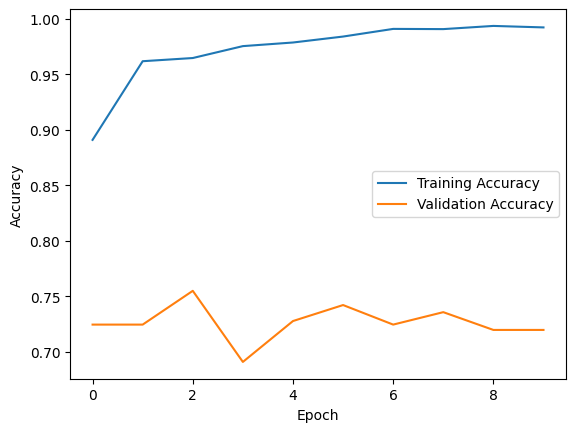

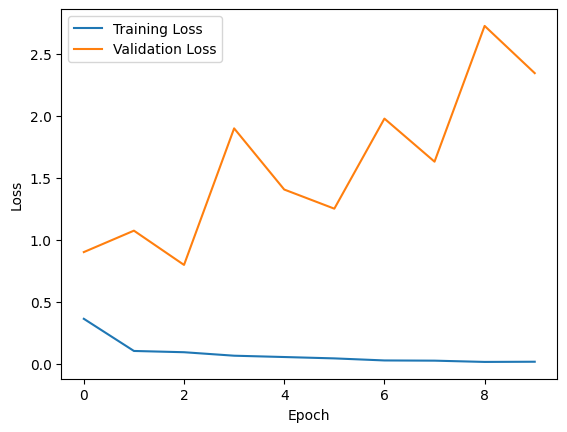

In [11]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [12]:
model.save('model.h5')
